# Get marmousi model from the internet

In [18]:
download("https://s3.amazonaws.com/open.source.geoscience/open_data/elastic-marmousi/elastic-marmousi-model.tar.gz","./elastic-marmousi-model.tar.gz")

"./elastic-marmousi-model.tar.gz"

## Extract tarball using command line tar

In [19]:
;tar -xzvf elastic-marmousi-model.tar.gz

elastic-marmousi-model/model/
elastic-marmousi-model/processed_data/SEGY-Time/Kirchhoff_PoSTM_time.segy.tar.gz
elastic-marmousi-model/processed_data/SEGY-Time/SYNTHETIC_time.segy.tar.gz
elastic-marmousi-model/model/LAYER_PROPERTIES.pdf
elastic-marmousi-model/processed_data/SEGY-Depth/SYNTHETIC.segy.tar.gz
elastic-marmousi-model/processed_data/
elastic-marmousi-model/processed_data/SEGY-Depth/Kirchhoff_PreSDM.segy.tar.gz
elastic-marmousi-model/model/FINAL_HORIZONS.asc
elastic-marmousi-model/model/FINAL_HORIZONS_GX2.asc
elastic-marmousi-model/processed_data/SEGY-Depth/Kirchhoff_PoSDM.segy.tar.gz
elastic-marmousi-model/processed_data/SEGY-Time/NMOstack_SRME_time.segy.tar.gz
elastic-marmousi-model/processed_data/SEGY-Depth/Vs.segy.tar.gz
elastic-marmousi-model/processed_data/SEGY-Depth/NMOstack.segy.tar.gz
elastic-marmousi-model/processed_data/SEGY-Depth/WE_PreSDM.segy.tar.gz
elastic-marmousi-model/reports/
elastic-marmousi-model/processed_data/SEGY-Time/
elastic-marmousi-model/model/MODEL

In [20]:
;tar -xzvf elastic-marmousi-model/model/MODEL_P-WAVE_VELOCITY_1.25m.segy.tar.gz

MODEL_P-WAVE_VELOCITY_1.25m.segy


## get a julia segy reader from slimgroup then read in segy -> downsample the model -> write it to disk as a binary

In [21]:
]add https://github.com/slimgroup/SegyIO.jl.git

   Updating git-repo `https://github.com/slimgroup/SegyIO.jl.git`
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`


In [22]:
using SegyIO

In [23]:
model = segy_read("MODEL_P-WAVE_VELOCITY_1.25m.segy");

┌ Warning: Fixed length trace flag set in stream: IOBuffer(data=UInt8[...], readable=true, writable=false, seekable=true, append=false, size=155653444, maxsize=Inf, ptr=3601, mark=-1)
└ @ SegyIO /home/cvx/.julia/packages/SegyIO/HHmmZ/src/read/read_file.jl:26


In [24]:
trcs = Float32.(model.data);
trcs_20m = trcs[1:16:end,1:16:end];

In [25]:
write("marmousi_vp_20m_176x851.bin",trcs_20m);

## Check to make sure the model looks correct

In [26]:
]add PyPlot

  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`


In [27]:
using PyPlot

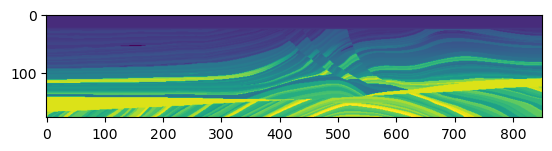

In [28]:
imshow(trcs_20m);

## Clean up the files we don't need

In [29]:
rm("MODEL_P-WAVE_VELOCITY_1.25m.segy",force=true);
rm("elastic-marmousi-model",force=true,recursive=true);
rm("elastic-marmousi-model.tar.gz",force=true);